A equação de laplace é dada por:

\begin{equation}
  \nabla^2u(x,y) = 0
\end{equation}

Com condições de contorno no domínio $(x,y) \in [0,1] \times [0,1]$ :

\begin{cases}
  u(0,y) = 0\\
  u(1,y) = 0\\
  u(x,0) = 0\\
  u(x,1) = sin(\pi x)sinh(\pi)
\end{cases}

Que possui solução exata dada por:

\begin{equation}
  u(x,y) = sin(\pi x)sinh(\pi y)
\end{equation}

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#dimensões do domínio
x0 = 0
xf = 1
y0 = 0
yf = 1

#número de pontos e discretização do domínio
n = 20
dx = (xf - x0)/(n-1)
dy = (yf - y0)/(n-1)

#arrays com os pontos para iterar
x = np.arange(x0, xf + dx, dx)
y = np.arange(y0, yf + dy, dy)

In [27]:
def source(x, y):
    return -200*x*(1-x) - 200*y*(1-y)

# Malha estruturada

Pela formulação dos volumes finitos:

\begin{equation}
  \int_{VC} (\nabla^2 u) dV = 0
\end{equation}

Usando o teorema de Gauss:

\begin{align}
  \int_{\partial V} (\nabla u \cdot n) dS = 0 \\
\end{align}

\begin{equation}
  \sum_{k=1}^{NumFaces} (\nabla u_k \cdot n_k) \Delta S_k = 0
\end{equation}

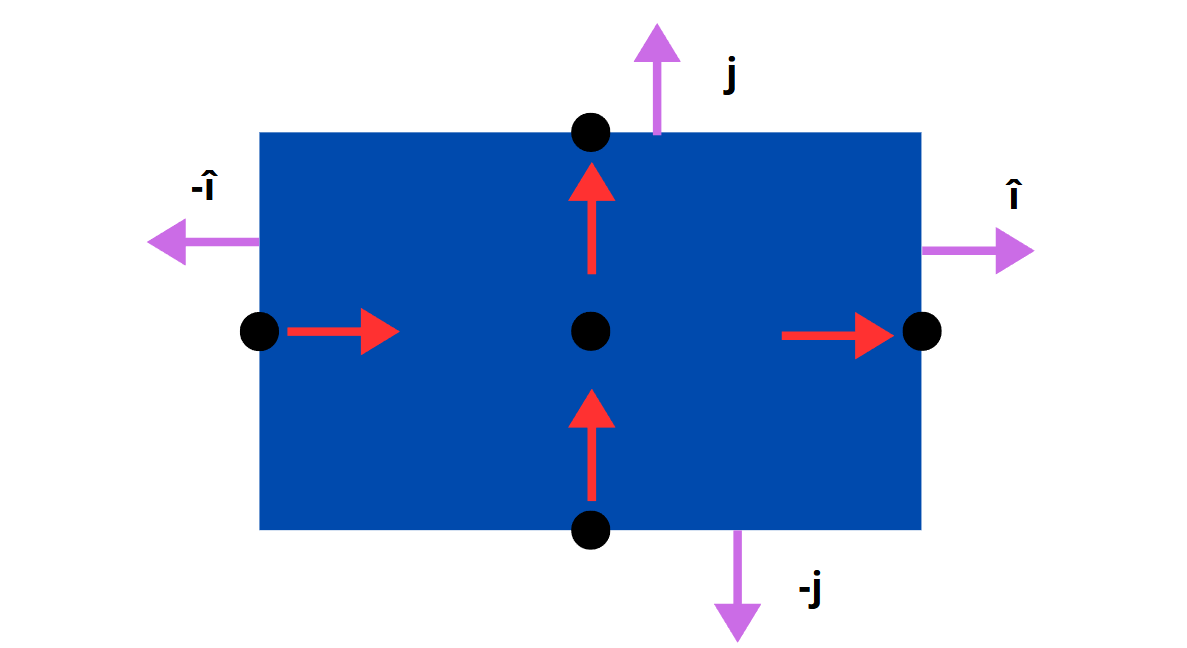

\begin{equation}
\Gamma_P A_P (u_E - u_P)/\Delta x + \Gamma_P A_P (u_W - u_P)/\Delta x + \Gamma_P A_P (u_N - u_P)/\Delta y + \Gamma_P A_P (u_S - u_P)/\Delta y = S_P \Delta V 
\end{equation}

\begin{equation}
    (\Gamma_P A_P u_E/\Delta x + \Gamma_P A_P u_W\Delta x + \Gamma_P A_P u_N\Delta y + \Gamma_P A_P u_S\Delta y - \Gamma_P A_P (2/\Delta x + 2\Delta y) u_P) = S_P \Delta V
\end{equation}

In [ ]:
import numpy as np
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

# Parâmetros
Nx, Ny = 5, 5            # número de volumes em x e y
Lx, Ly = 1.0, 1.0        # dimensões físicas
dx = Lx / Nx
dy = Ly / Ny
Gamma = 1.0              # difusividade
Area = 1.0               # área unitária (ex: 1 para malha 2D com dz=1)
Vol = dx * dy            # volume do controle

N = Nx * Ny              # número total de células

# Coeficientes
aE = Gamma * Area / dx
aW = Gamma * Area / dx
aN = Gamma * Area / dy
aS = Gamma * Area / dy
aP = - (2 * Gamma * Area / dx + 2 * Gamma * Area / dy)

# Fonte volumétrica (constante, por simplicidade)
S_P = -200*
b = np.full(N, S_P * Vol)

# Montagem da matriz A
A = np.zeros((N, N))

def idx(i, j):
    """Mapeia coordenadas 2D (i,j) para 1D"""
    return i + j * Nx

for j in range(Ny):
    for i in range(Nx):
        p = idx(i, j)

        A[p, p] = aP
        
        if i < Nx - 1:
            A[p, idx(i + 1, j)] = aE
        if i > 0:
            A[p, idx(i - 1, j)] = aW
        if j < Ny - 1:
            A[p, idx(i, j + 1)] = aN
        if j > 0:
            A[p, idx(i, j - 1)] = aS

        # Condições de contorno de Dirichlet homogêneas (u=0):
        if i == 0:
            A[p, p] -= aW
        if i == Nx - 1:
            A[p, p] -= aE
        if j == 0:
            A[p, p] -= aS
        if j == Ny - 1:
            A[p, p] -= aN

# Resolver o sistema linear
print(A)
print(b)
# A_csr = A.tocsr()
# u = spsolve(A_csr, b)

# # Converter para formato 2D
# u_2d = u.reshape((Ny, Nx))

[[-30.   5.   0.   0.   0.   5.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  5. -25.   5.   0.   0.   0.   5.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   5. -25.   5.   0.   0.   0.   5.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   5. -25.   5.   0.   0.   0.   5.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   5. -30.   0.   0.   0.   0.   5.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  5.   0.   0.   0.   0. -25.   5.   0.   0.   0.   5.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   5.   0.   0.   0.   5. -20.   5.   0.   0.   0.   5.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   5.   0.   0.   0.   5. -20.   5.   0.   0.   0.   5.   0.
    0.   0.   0.  